In [11]:
import pickle as pkl
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib

In [29]:
with open('vst_transform.pickle', 'rb') as f:
    vst = pkl.load(f)
vst = vst.swapaxes(0, 2)

In [50]:
def get_data(filename: str) -> np.ndarray:
    file = nib.load(filename)
    data = file.get_fdata()
    return data

def plot_data(data: np.ndarray, scale: float=0.1, dim: int=0, slice: int=50) -> None:
    shape = list(data.shape)
    shape.pop(dim)
    imgsize = np.multiply(shape, scale)
    # plt.figure(figsize=imgsize)
    if dim == 0:
        data = data[slice, :, :]
    elif dim == 1:
        data = data[:, slice, :]
    elif dim == 2:
        data = data[:, :, slice]
    else:
        raise ValueError('Wrong dim argument')
    plt.imshow(data)
    # plt.show()

In [42]:
data_dis = get_data('/home/alexkkir/ai-masters/linal/project/t1_icbm_normal_1mm_pn3_rf20.mnc')
data_ref = get_data('/home/alexkkir/ai-masters/linal/project/t1_icbm_normal_1mm_pn0_rf20.mnc')

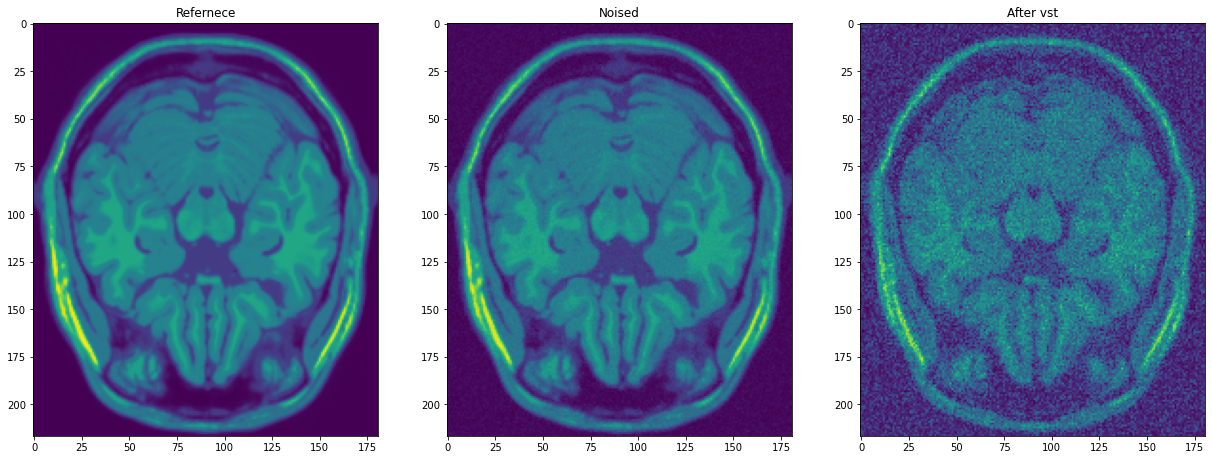

In [51]:
plt.figure(figsize=(21, 10))
plt.subplot(1, 3, 1)
plt.title('Refernece')
plot_data(data_ref, dim=0, slice=50)
plt.subplot(1, 3, 2)
plt.title('Noised')
plot_data(data_dis, dim=0, slice=50)
plt.subplot(1, 3, 3)
plt.title('After vst')
plot_data(vst, dim=0, slice=50)
plt.show()

(array([3.354611e+06, 8.102900e+05, 5.348290e+05, 9.978560e+05,
        6.758870e+05, 5.849050e+05, 5.404800e+04, 5.616600e+04,
        3.760700e+04, 2.938000e+03]),
 array([7.73089141e-03, 1.36834904e+02, 2.73662076e+02, 4.10489249e+02,
        5.47316421e+02, 6.84143594e+02, 8.20970767e+02, 9.57797939e+02,
        1.09462511e+03, 1.23145228e+03, 1.36827946e+03]),
 <BarContainer object of 10 artists>)

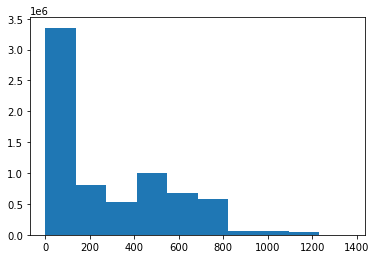

In [39]:
plt.hist(data_dis.flatten())

(array([1.851697e+06, 1.719661e+06, 1.382149e+06, 1.072334e+06,
        7.324640e+05, 2.476800e+05, 7.208900e+04, 2.720600e+04,
        3.727000e+03, 1.300000e+02]),
 array([0.15, 0.22, 0.29, 0.36, 0.43, 0.5 , 0.57, 0.64, 0.71, 0.78, 0.85]),
 <BarContainer object of 10 artists>)

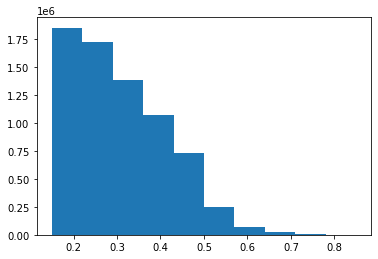

In [40]:
plt.hist(vst.flatten())

In [52]:
(((vst - vst.mean()) / vst.std() - (data_ref -data_ref.mean()) / data_ref.std()) ** 2).mean()

0.2350505144563903

In [53]:
(((data_dis - data_dis.mean()) / data_dis.std() - (data_ref -data_ref.mean()) / data_ref.std()) ** 2).mean()

0.005182207174601887

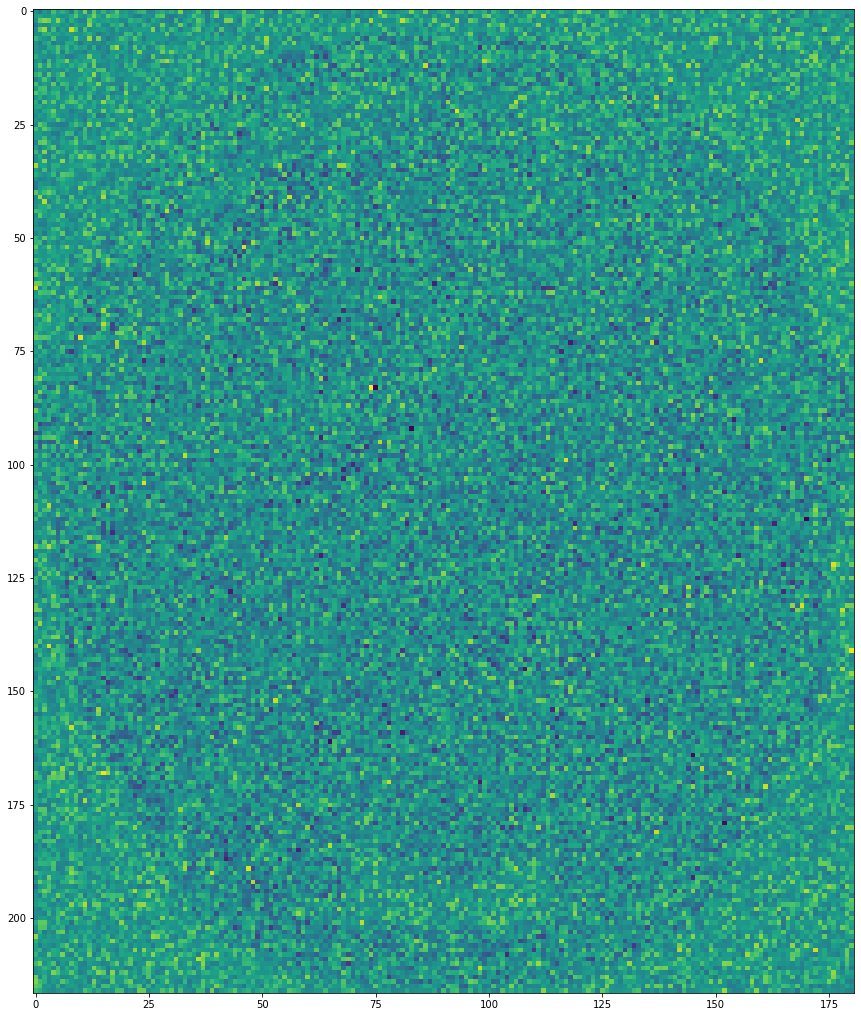

In [47]:
plot_data((vst - vst.mean()) / vst.std() - (data_ref -data_ref.mean()) / data_ref.std() , dim=0, slice=50)

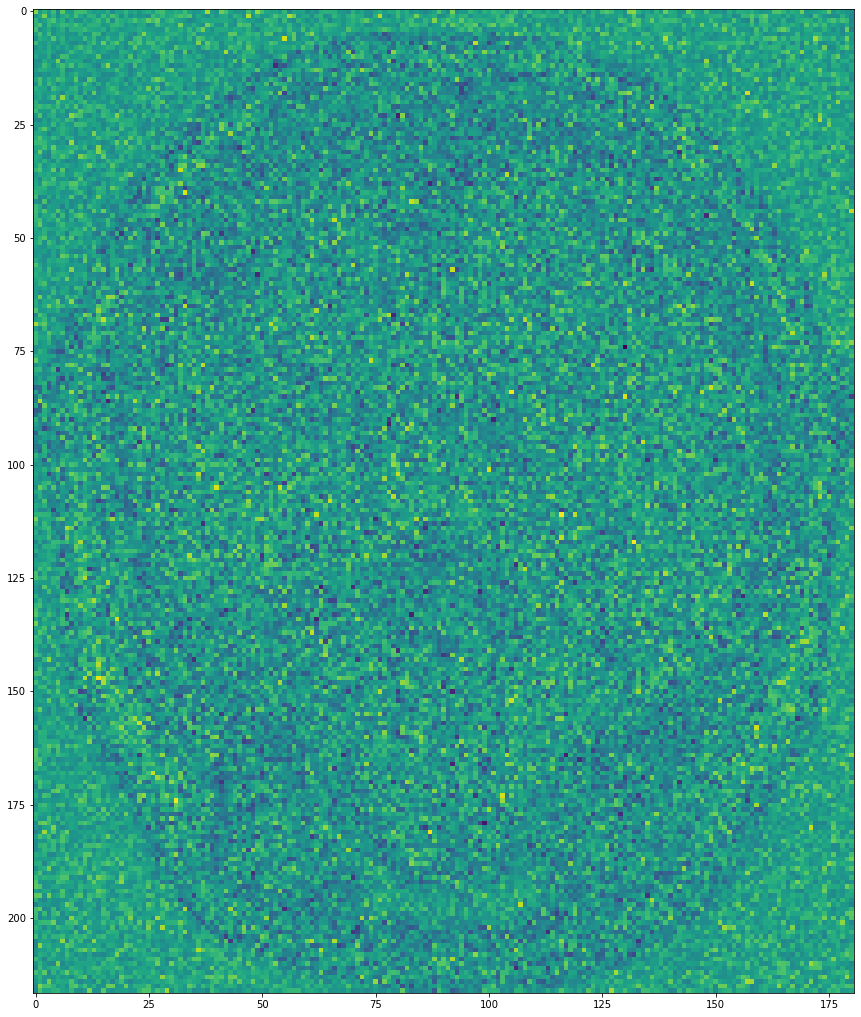

In [48]:
plot_data((data_dis - data_dis.mean()) / data_dis.std() - (data_ref -data_ref.mean()) / data_ref.std() , dim=0, slice=50)